# CAPSTONE PROJECT 2 : PRCP 1016 HEART DIESEASE PREDICTION

## PROJECT ID : PTID-CDS-FEB-24-1794A

### Step 1 - Predict if a person suffering from heart disease or not using various classification algorithm.

Heart disease prediction with machine learning involves analyzing medical data, training models to identify patterns indicative of cardiovascular health, validating their accuracy, and deploying them for early detection and personalized prevention.

* Task 1: Prepare a complete data analysis report on the given data.
* Task 2:- Create a predictive model which will helps to predict the heart disease

# Step 2: IMPORT LIBRARIES

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Step 3: LOAD DATA 

In [2]:
# import data
df1 = pd.read_csv("values.csv")
df2 = pd.read_csv("labels.csv")

In [3]:
# Load specific columns from the first CSV file
df1 = pd.read_csv('values.csv')[['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']]

# Load specific columns from the second CSV file
df2 = pd.read_csv('labels.csv')[['heart_disease_present']]

# Combine the selected columns horizontally
data = pd.concat([df1, df2], axis=1)


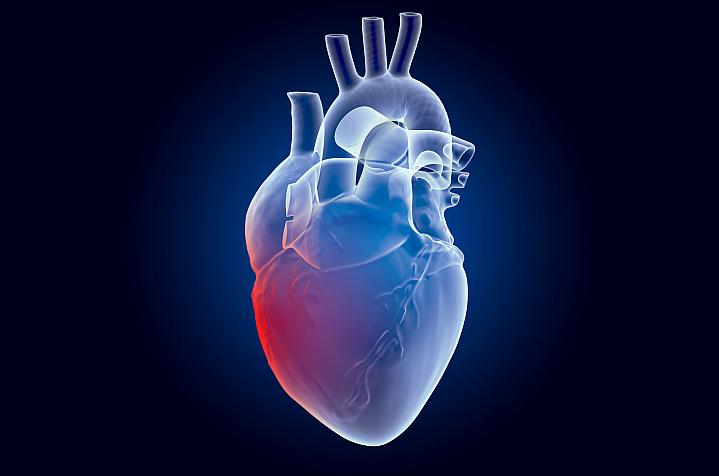

In [4]:
from IPython.display import Image
Image("heartpic.jpg")

In [5]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Step 4: DOMAIN ANALYSIS

### The heart disease dataset contains the following features:


There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining features are described in the section below.

• slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

• thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

• resting_blood_pressure (type: int): resting blood pressure

• chest_pain_type (type: int): chest pain type (4 values)

• num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

• fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

• resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

• serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

• oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

• sex (type: binary): 0: female, 1: male

• age (type: int): age in years

• max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

• exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

• heart_disease_present(type: binary): heart disease(0: not present,1: present)


# Step 5 : Basic Checks

In [6]:
# to see the first five data 
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [7]:
# to see bottom five data
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [8]:
# to see the number of rows and columns
data.shape

(180, 15)

In [9]:
# to see the size of the data
data.size

2700

In [10]:
# name of all the columns
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [11]:
# to see the datatypes of all the column 
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [12]:
# to see the statistical parameters of categorical columns
data.describe(include=["O"])

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [13]:
# to see the statistical parameters of numerical columns
data.describe(include=["int64","float64"])

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [14]:
# to check the memory used
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [15]:
# description of all columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [16]:
# checking the null counts 
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [17]:
data["heart_disease_present"].unique()

array([0, 1], dtype=int64)

In [18]:
data.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

# Step 6: EXPLORATORY DATA ANALYSIS

## Analysing the target variable:

0    100
1     80
Name: heart_disease_present, dtype: int64


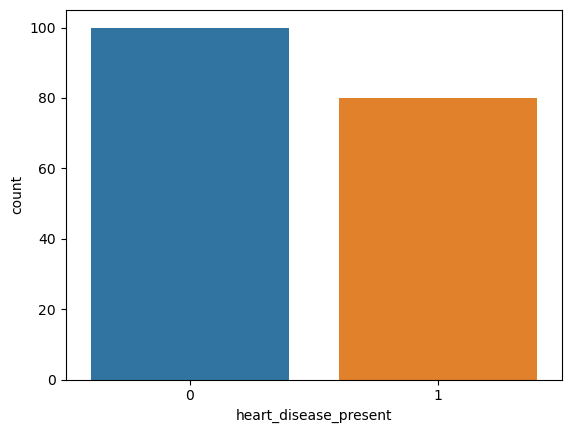

In [19]:
# Create a count plot with class labels
sns.countplot(x='heart_disease_present', data=data)

# Display the count of each class
target_temp = data['heart_disease_present'].value_counts()
print(target_temp)

# Show the plot
plt.show()

In [20]:
print("Percentage of patient without heart problems: "+str(round(target_temp[0]*100/180,2)))
print("Percentage of patient with heart problems: "+str(round(target_temp[1]*100/180,2)))

Percentage of patient without heart problems: 55.56
Percentage of patient with heart problems: 44.44


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'slope', 'agina' and 'thal' features

#### Analysing the 'Sex' feature

In [21]:
data["sex"].unique()

array([1, 0], dtype=int64)

#### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='heart_disease_present'>

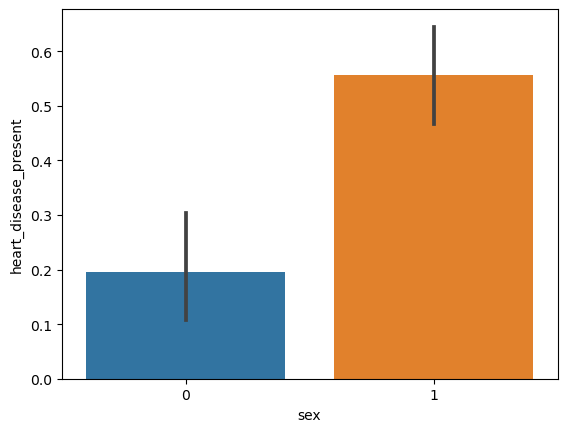

In [22]:
# Create a bar plot
sns.barplot(x='sex', y='heart_disease_present', data=data)

### Insights:
* We notice, that males are more likely to have heart problems than females

### Analysing the 'Chest Pain Type' feature

In [23]:
data["chest_pain_type"].unique()

array([2, 3, 4, 1], dtype=int64)

* As expected, the CP feature has values from 0 to 3

<Axes: xlabel='chest_pain_type', ylabel='heart_disease_present'>

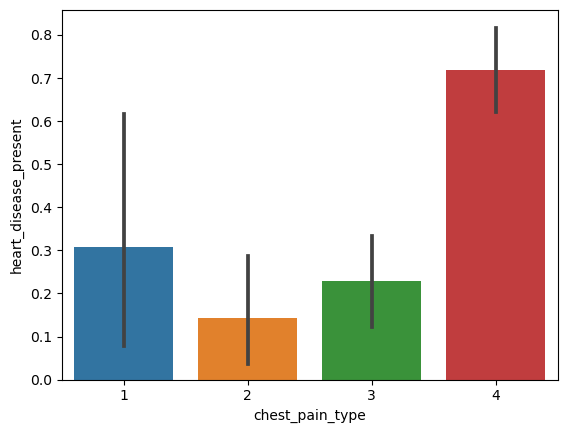

In [24]:
sns.barplot(x='chest_pain_type', y='heart_disease_present', data=data)

### Insight:
* We notice, that chest pain of '4', i.e. the ones with typical angina are much more likely to have heart problems

## Analysing the Fasting blood sugar feature

In [25]:
data["fasting_blood_sugar_gt_120_mg_per_dl"].unique()

array([0, 1], dtype=int64)

**As expected, the Fasting blood sugar feature has two unique features**

<Axes: xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='heart_disease_present'>

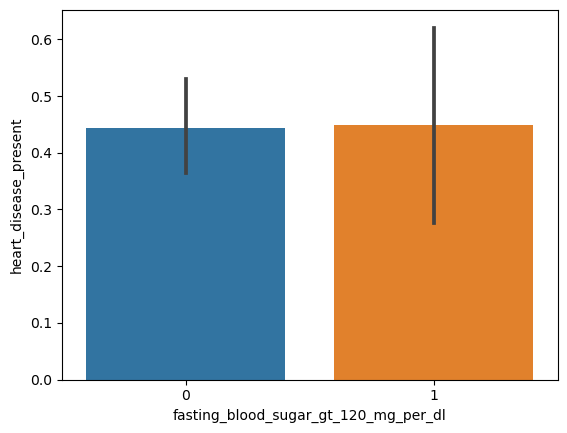

In [26]:
sns.barplot(x='fasting_blood_sugar_gt_120_mg_per_dl', y='heart_disease_present', data=data)

### Analysing the Resting ECG feature

In [27]:
data["resting_ekg_results"].unique()

array([2, 0, 1], dtype=int64)

<Axes: xlabel='resting_ekg_results', ylabel='heart_disease_present'>

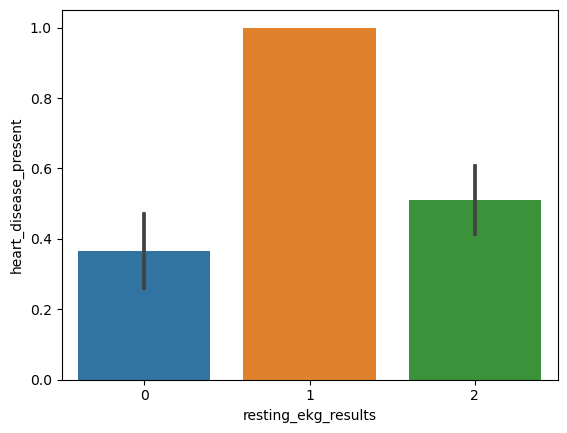

In [28]:
sns.barplot(x='resting_ekg_results', y='heart_disease_present', data=data)

### Insight:
* We realize that people with restecg '1' are much more likely to have a heart disease than with restecg '2' and '0'

## Analysing the Slope of peak exercise feature

In [29]:
data["slope_of_peak_exercise_st_segment"].unique()

array([1, 2, 3], dtype=int64)

<Axes: xlabel='slope_of_peak_exercise_st_segment', ylabel='heart_disease_present'>

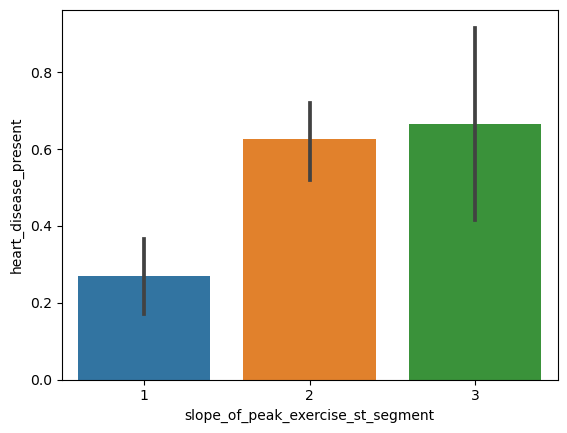

In [30]:
sns.barplot(x='slope_of_peak_exercise_st_segment', y='heart_disease_present', data=data)

### Insight:
* We realize that people with restecg '2' and '3' are much more likely to have a heart disease than with restecg '1'

## Analysing the Exercise induced agina feature

In [31]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exercise_induced_angina', ylabel='heart_disease_present'>

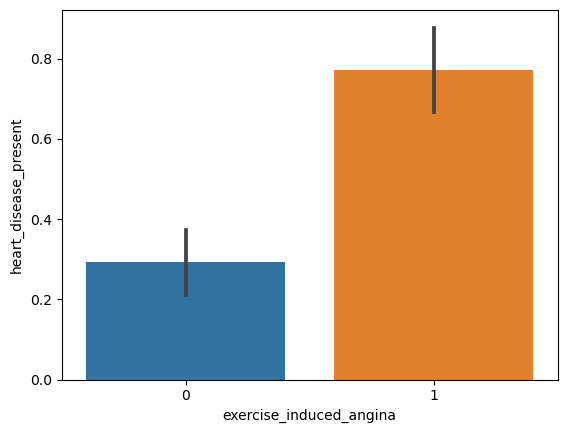

In [32]:
sns.barplot(x='exercise_induced_angina', y='heart_disease_present', data=data)

### Insight :
* We realize that people with exercise induced angina of type 1 are much more likely to have a heart disease

<Axes: xlabel='thal', ylabel='heart_disease_present'>

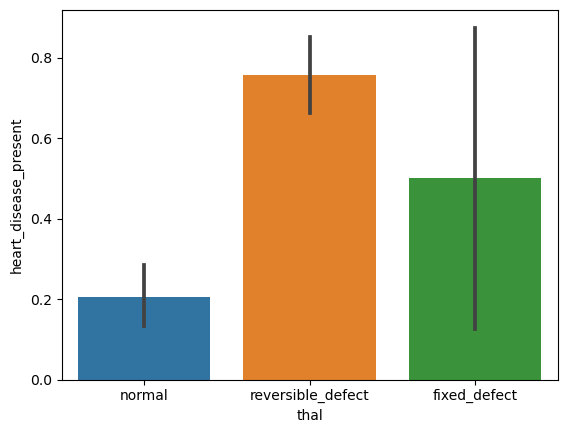

In [33]:
sns.barplot(x='thal', y='heart_disease_present', data=data)

### Insight:
* Patients with 'normal' thal values have the highest chance of having no heart disease.
* Patients with 'reversible_defect' thal values have the highest chance of having heart disease.
* Patients with 'fixed_defect' thal values have the equal chance of having heart disease or not having heart disease.

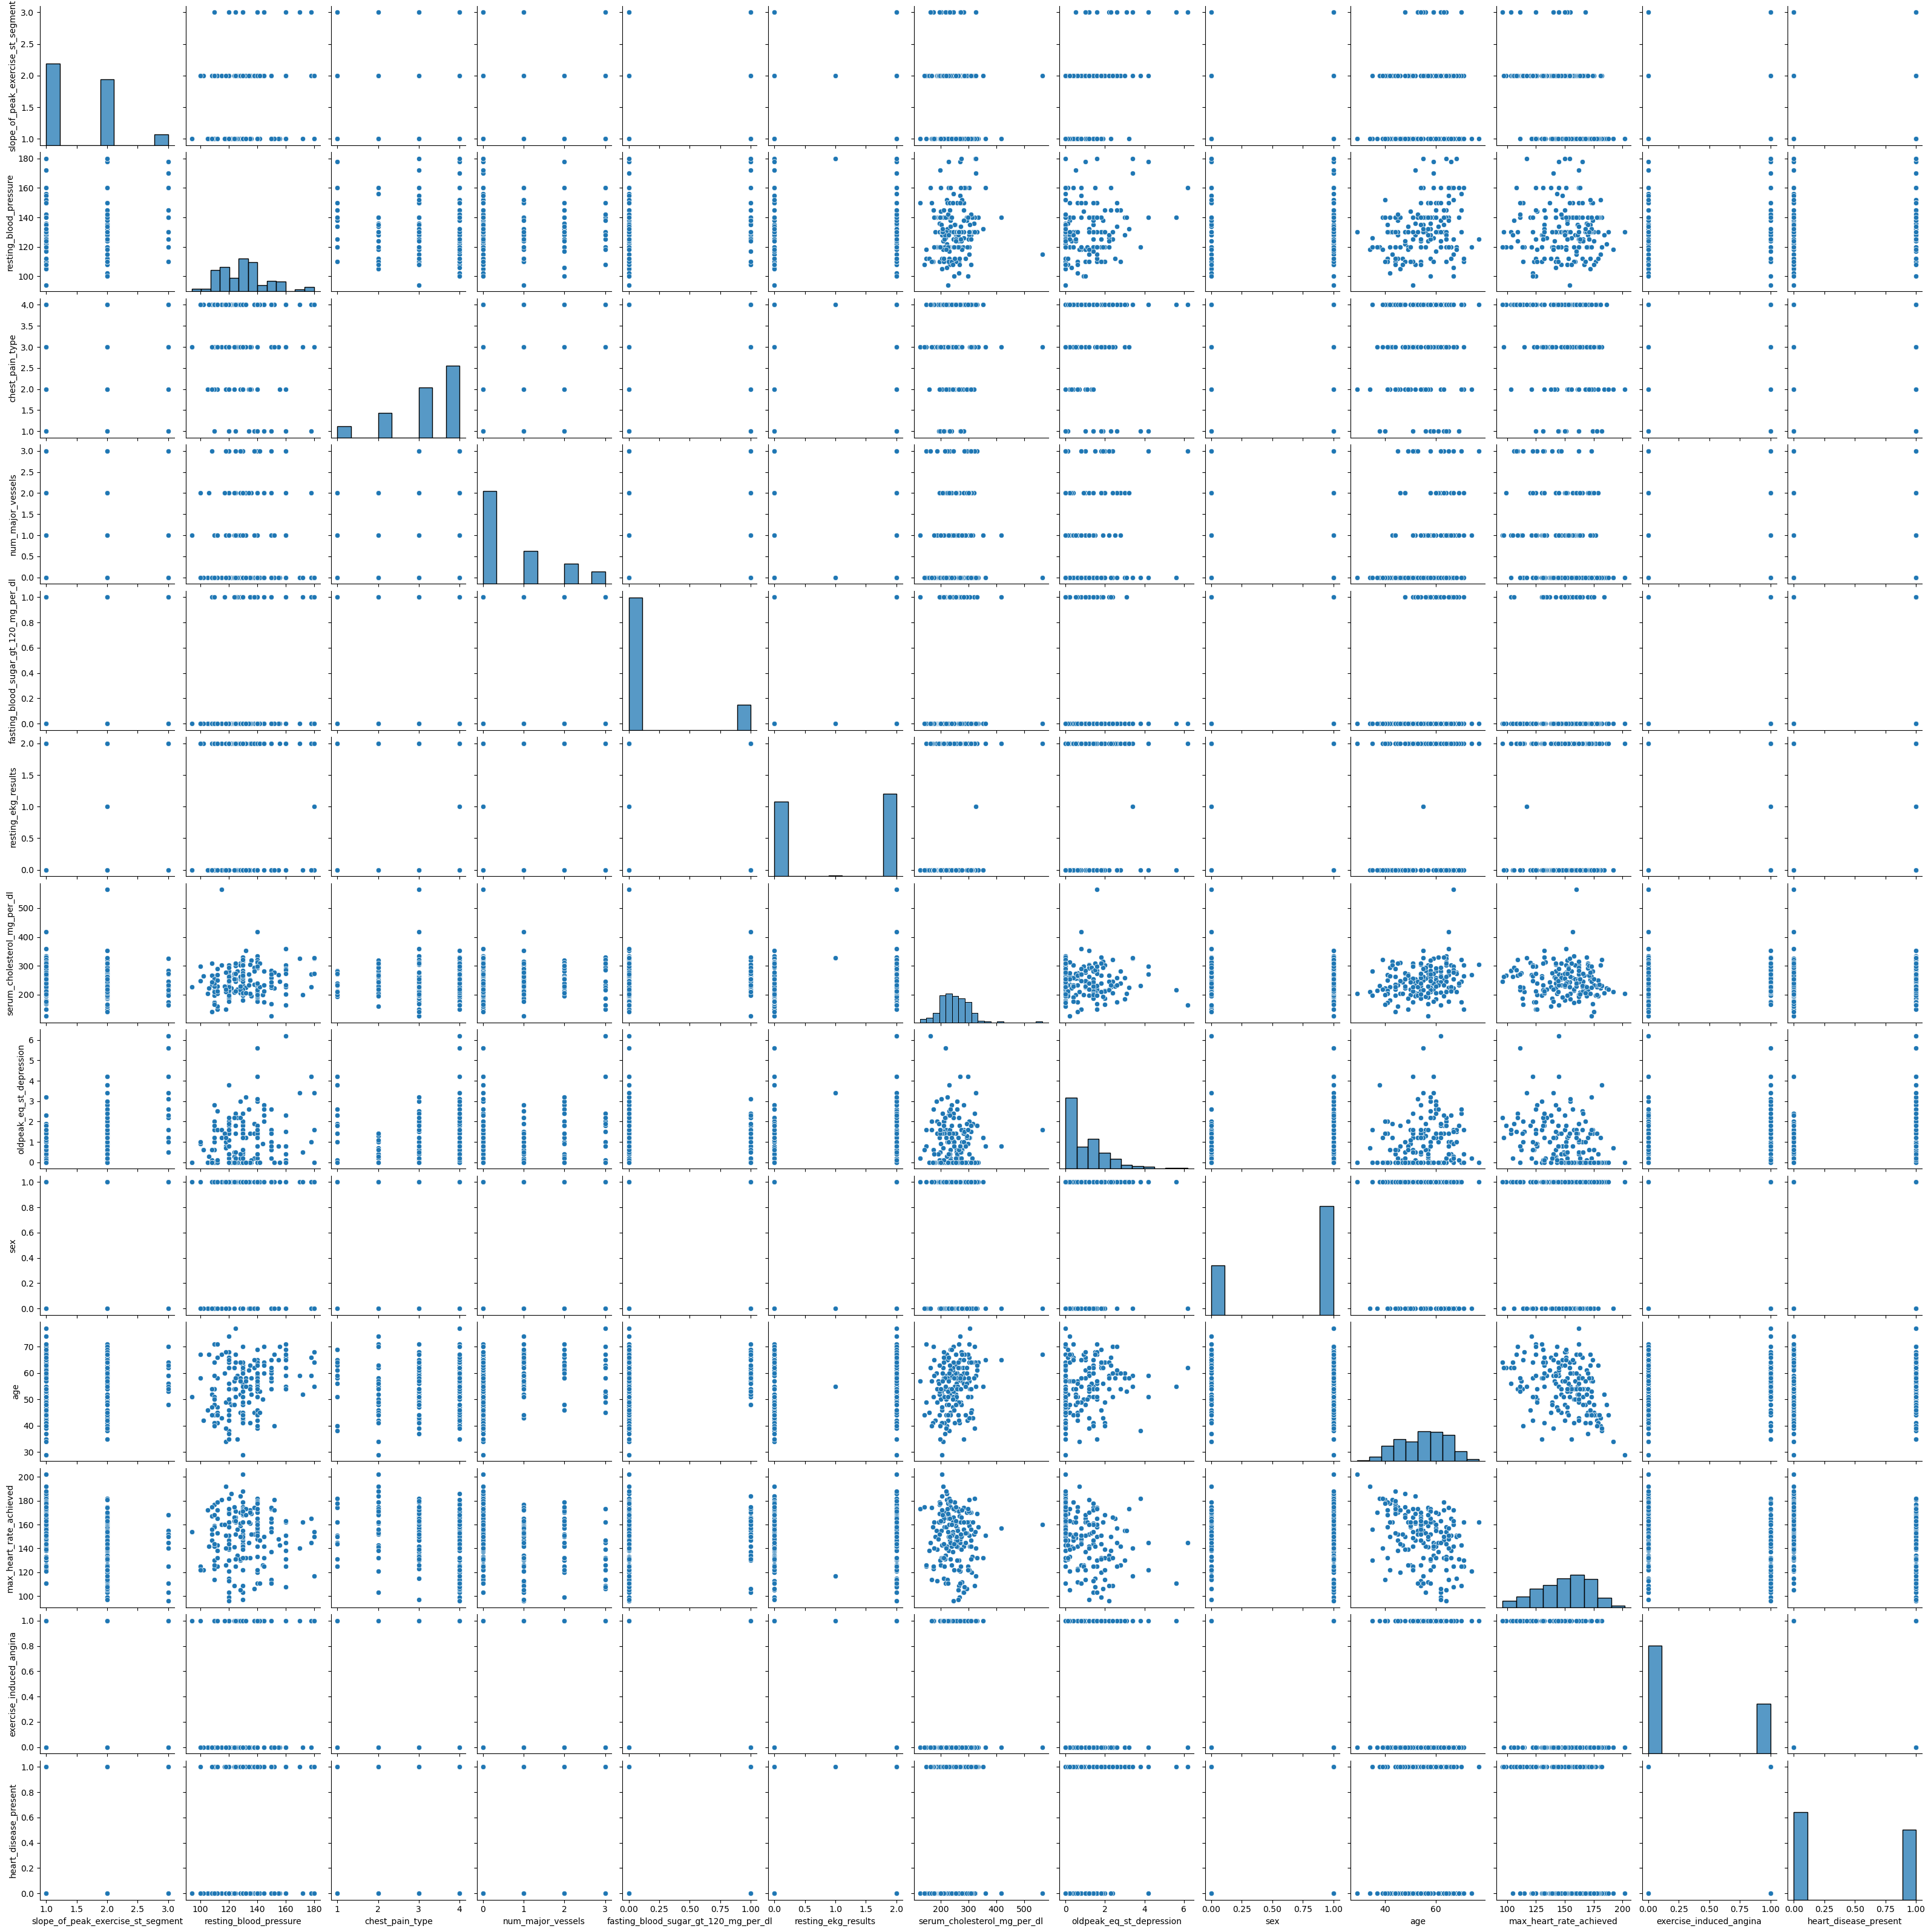

In [34]:
sns.pairplot(data)

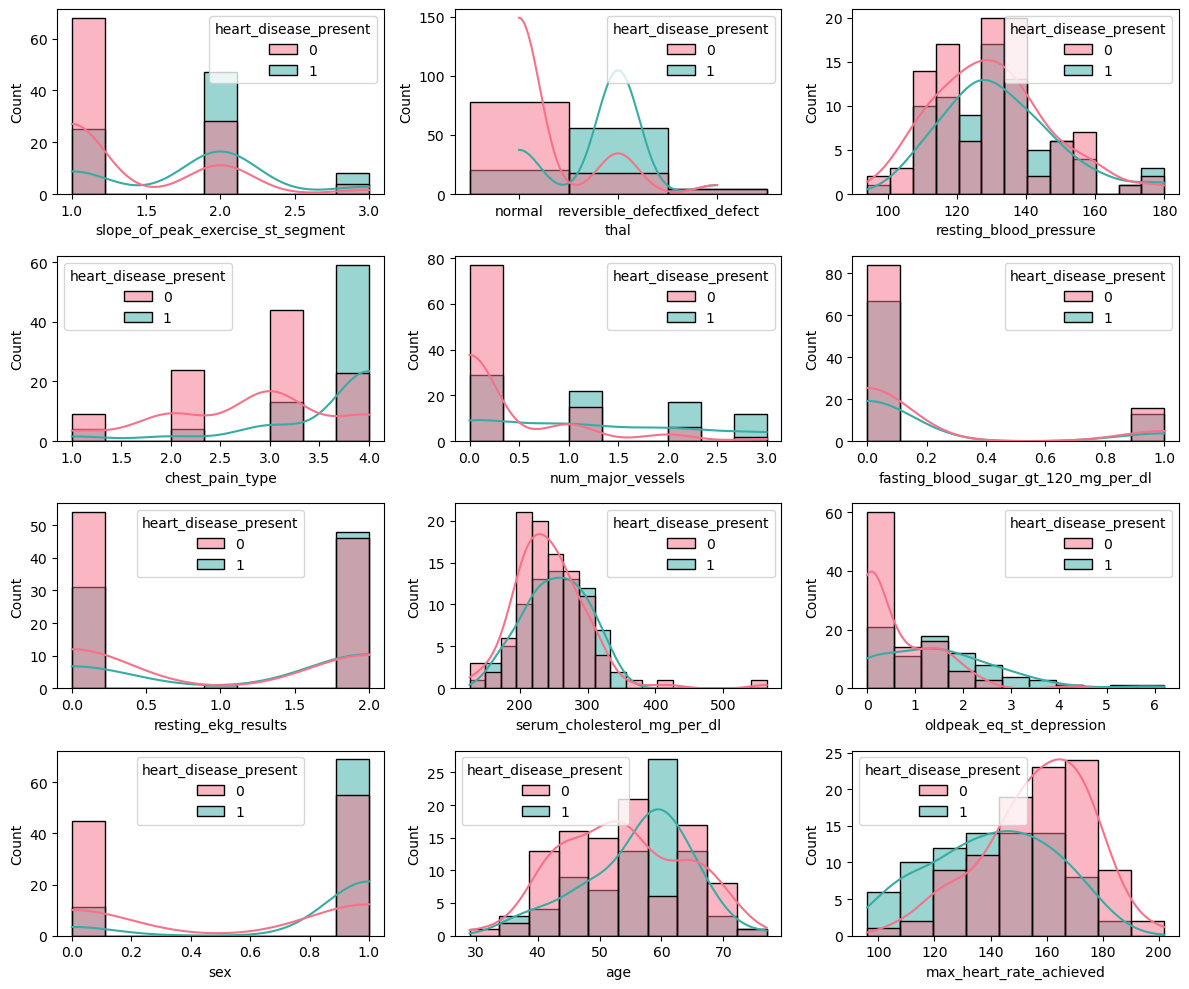

In [35]:
# Assuming 'data' is your DataFrame and 'y' is your target variable
p = data.drop('patient_id', axis=1)

plt.figure(figsize=(12, 10))
plotnum = 1

for column in p:
    if plotnum <= 12:
        ax = plt.subplot(4, 3, plotnum)
        sns.histplot(x=p[column], hue=data['heart_disease_present'], kde=True, palette='husl')  # Using hue for target variable
        plt.xlabel(column, fontsize=10)
    plotnum += 1

plt.tight_layout()
plt.show()

### Insights:

* slope :People with Slope '3' causes heart disease much more than Slope '1' and '2'

* thal :Patients with 'reversible_defect' thal values have the highest chance of having heart disease.*

* cp :People with chest pain type 4 have heart diseases the most.

* major_vessels :People with 3 major vessels are more prone to heart diseases.

* fbs :Fasting blood sugar doesn't have much effect on heart disease.

* rest_ecg :People with resting electrocardiographic value 1 are more likely to have heart disease.

* sex :Males have more than 2 times chance to get heart disease when compared to females.

* angina:Patients having excercise induced chest pain are more prone to heart diseases.

In [36]:
!pip install sweetviz

In [37]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Step 7: DATA PREPROCESSING

In [38]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [39]:
data.duplicated().sum()

0

In [40]:
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [41]:
data=pd.get_dummies(data,columns=["thal"],drop_first=True)

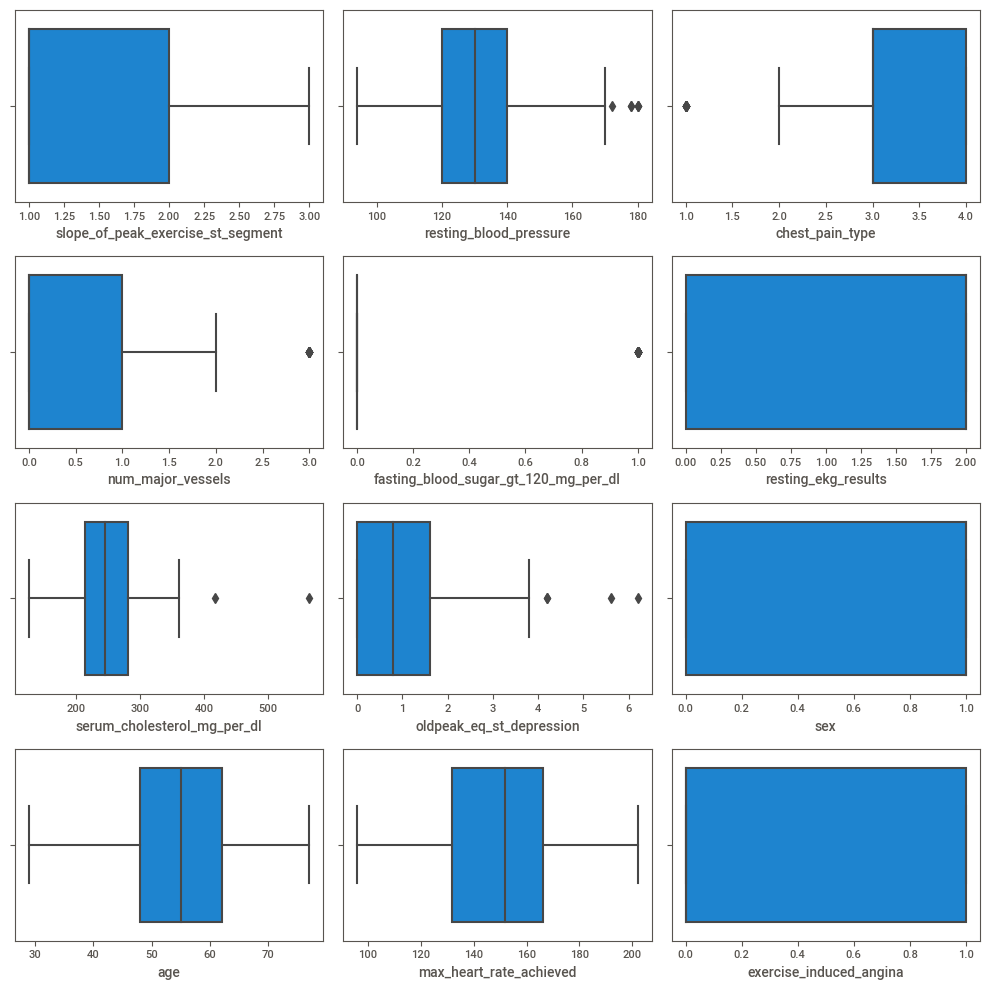

In [42]:
p=data.drop('patient_id',axis=1)
plt.figure(figsize=(10,10))
plotnum=1
for column in p:
    if plotnum<=12:
        ax=plt.subplot(4,3,plotnum)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
    plotnum+=1
plt.tight_layout()

<Axes: xlabel='resting_blood_pressure', ylabel='Count'>

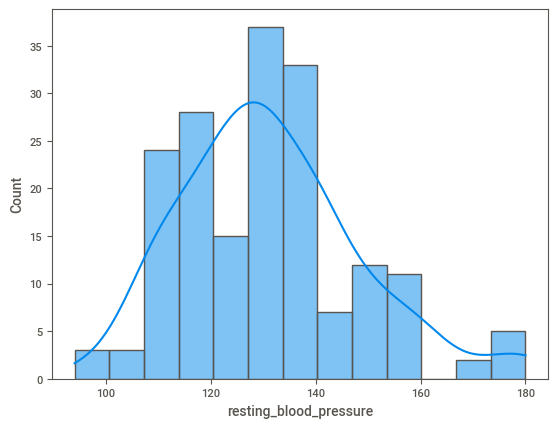

In [43]:
sns.histplot(x=data.resting_blood_pressure,kde=True)

**Handeling the Outliers**

In [44]:
q1=data['resting_blood_pressure'].quantile(0.25)
q3=data['resting_blood_pressure'].quantile(0.75)    
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
median=data['resting_blood_pressure'].median()
data['resting_blood_pressure']=data['resting_blood_pressure'].mask((data['resting_blood_pressure']<lower)|(data['resting_blood_pressure']>upper),median)

<Axes: xlabel='serum_cholesterol_mg_per_dl', ylabel='Count'>

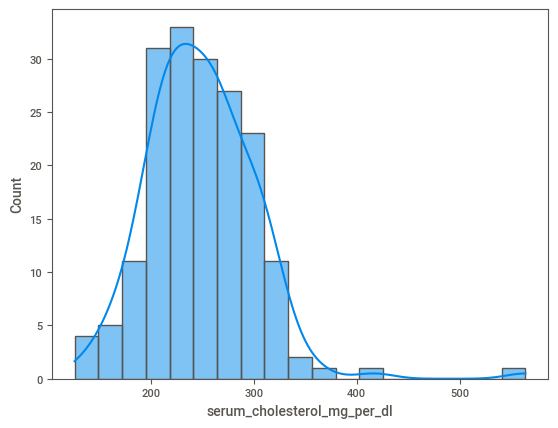

In [45]:
sns.histplot(x=data.serum_cholesterol_mg_per_dl,kde=True)

In [46]:
q1=data['serum_cholesterol_mg_per_dl'].quantile(0.25)
q3=data['serum_cholesterol_mg_per_dl'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
median=data['serum_cholesterol_mg_per_dl'].median()
data['serum_cholesterol_mg_per_dl']=data['serum_cholesterol_mg_per_dl'].mask((data['serum_cholesterol_mg_per_dl']<lower)|(data['serum_cholesterol_mg_per_dl']>upper),median)

<Axes: xlabel='oldpeak_eq_st_depression', ylabel='Count'>

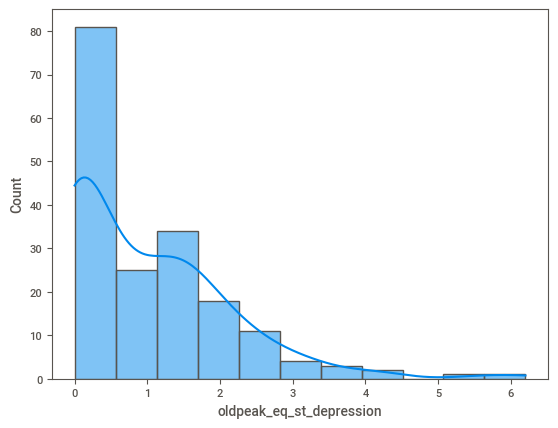

In [47]:
sns.histplot(x=data.oldpeak_eq_st_depression,kde=True)

In [48]:
q1=data['oldpeak_eq_st_depression'].quantile(0.25)
q3=data['oldpeak_eq_st_depression'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
median=data['oldpeak_eq_st_depression'].median()
data['oldpeak_eq_st_depression']=data['oldpeak_eq_st_depression'].mask((data['oldpeak_eq_st_depression']<lower)|(data['oldpeak_eq_st_depression']>upper),median)

# Step 8: FEATURE ENGINEERING

In [49]:
data.drop('patient_id',axis=1,inplace=True)

In [50]:
data.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308.0,0.0,1,45,170,0,0,1,0
1,2,110,3,0,0,0,214.0,1.6,0,54,158,0,0,1,0
2,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1,1,0
3,1,152,4,0,0,0,223.0,0.0,1,40,181,0,1,0,1
4,3,130,1,0,0,2,270.0,0.8,1,59,145,0,0,0,1


In [51]:
data.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
slope_of_peak_exercise_st_segment,1.000000,0.061536,0.121207,0.076832,0.050199,0.172191,-0.047307,0.535583,0.093340,0.169918,-0.418102,0.225459,0.344224,-0.305492,0.243341
resting_blood_pressure,0.061536,1.000000,-0.037038,0.090367,0.096842,0.113544,0.163281,0.110505,-0.016618,0.259479,-0.014901,0.056117,0.076048,-0.071726,0.000293
chest_pain_type,0.121207,-0.037038,1.000000,0.249061,-0.088992,0.033379,0.081077,0.070715,0.086057,0.085001,-0.301792,0.346266,0.412829,-0.300914,0.307524
num_major_vessels,0.076832,0.090367,0.249061,1.000000,0.169792,0.096656,0.135630,0.167406,0.073107,0.347355,-0.275687,0.153407,0.421519,-0.185283,0.194026
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.096842,-0.088992,0.169792,1.000000,0.053864,0.001109,-0.002458,0.066010,0.176101,0.058369,-0.005956,0.003379,-0.023938,-0.028324
resting_ekg_results,0.172191,0.113544,0.033379,0.096656,0.053864,1.000000,0.141028,0.118666,0.045786,0.126856,-0.102766,0.037773,0.145933,0.023521,-0.041946
serum_cholesterol_mg_per_dl,-0.047307,0.163281,0.081077,0.135630,0.001109,0.141028,1.000000,-0.006879,-0.087374,0.200082,-0.108363,0.137476,0.146419,0.048687,-0.010893
oldpeak_eq_st_depression,0.535583,0.110505,0.070715,0.167406,-0.002458,0.118666,-0.006879,1.000000,0.121071,0.202029,-0.324242,0.263756,0.388253,-0.289730,0.255868
sex,0.093340,-0.016618,0.086057,0.073107,0.066010,0.045786,-0.087374,0.121071,1.000000,-0.148997,-0.053960,0.251096,0.335421,-0.421950,0.366381
age,0.169918,0.259479,0.085001,0.347355,0.176101,0.126856,0.200082,0.202029,-0.148997,1.000000,-0.394630,0.081811,0.138255,-0.049719,0.020593


<Axes: >

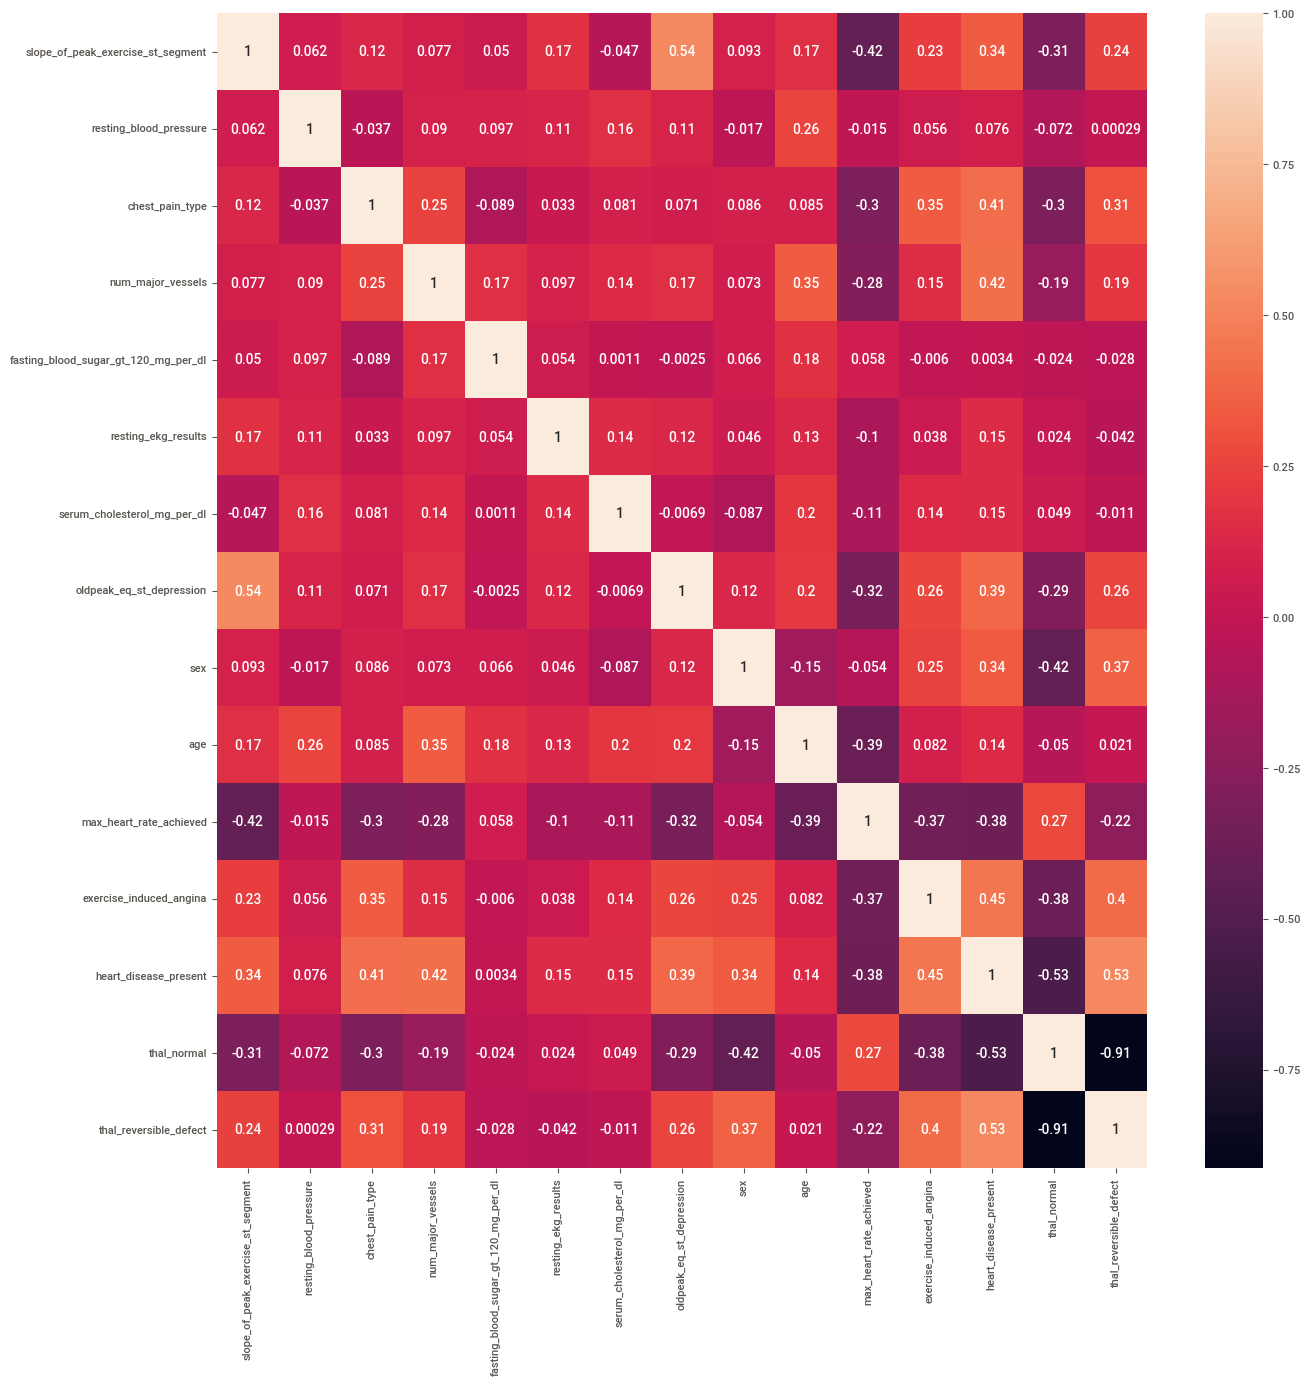

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

# Step 9: TRAIN TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split
x=data.drop("heart_disease_present",axis=1)
y = data["heart_disease_present"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [54]:
x_train.shape

(126, 14)

In [55]:
x_test.shape

(54, 14)

In [56]:
y_train.shape

(126,)

In [57]:
y_test.shape

(54,)

# Step 10: MODEL FITTING

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression 

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled
df1=pd.DataFrame(x_train_scaled,columns=x_train.columns)
df1

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
0,0.5,0.407895,0.666667,0.000000,1.0,1.0,0.583333,0.631579,1.0,0.459459,0.729167,0.0,1.0,0.0
1,0.0,0.315789,0.666667,1.000000,0.0,1.0,0.112745,0.210526,1.0,0.405405,0.312500,0.0,1.0,0.0
2,0.5,0.342105,1.000000,0.000000,0.0,0.0,0.352941,0.421053,1.0,0.027027,0.354167,1.0,0.0,1.0
3,1.0,0.210526,0.333333,0.000000,0.0,0.0,0.504902,0.263158,1.0,0.378378,0.750000,0.0,0.0,1.0
4,0.5,0.526316,0.000000,0.666667,0.0,0.0,0.529412,0.684211,1.0,0.729730,0.510417,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.0,0.236842,1.000000,0.000000,0.0,0.0,0.382353,0.026316,1.0,0.351351,0.489583,0.0,1.0,0.0
122,0.0,0.736842,0.666667,0.000000,0.0,1.0,0.519608,0.421053,1.0,0.540541,0.718750,0.0,0.0,1.0
123,0.5,0.342105,0.000000,0.000000,0.0,0.0,0.514706,1.000000,1.0,0.108108,0.895833,1.0,0.0,1.0
124,0.0,0.539474,0.666667,0.000000,1.0,0.0,0.872549,0.000000,0.0,0.540541,0.770833,0.0,1.0,0.0


In [60]:
x_test_scaled=scaler.fit_transform(x_test)
df2=pd.DataFrame(x_test_scaled,columns=x_test.columns)
df2

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
0,0.0,0.586207,0.333333,0.666667,1.0,1.0,0.787565,0.000000,0.0,0.604167,0.468085,0.0,1.0,0.0
1,0.0,0.137931,0.666667,0.333333,1.0,1.0,0.507772,0.000000,0.0,0.875000,0.234043,0.0,1.0,0.0
2,0.0,0.172414,1.000000,0.333333,0.0,1.0,0.637306,0.000000,1.0,0.312500,0.478723,0.0,1.0,0.0
3,0.5,0.741379,1.000000,0.666667,0.0,1.0,0.595855,0.823529,1.0,0.645833,0.361702,1.0,0.0,1.0
4,0.0,0.655172,0.333333,0.666667,0.0,0.0,0.145078,0.000000,0.0,0.708333,0.755319,0.0,1.0,0.0
5,0.5,0.724138,1.000000,0.000000,0.0,1.0,0.170984,0.264706,1.0,0.437500,0.191489,1.0,0.0,1.0
6,0.0,0.931034,0.333333,0.000000,0.0,1.0,0.404145,0.000000,1.0,0.854167,0.372340,0.0,1.0,0.0
7,0.5,0.568966,0.333333,0.000000,0.0,1.0,0.430052,0.411765,0.0,0.541667,0.563830,0.0,1.0,0.0
8,0.5,0.482759,0.666667,0.000000,1.0,1.0,0.554404,0.470588,1.0,0.812500,0.446809,1.0,0.0,1.0
9,0.5,0.517241,1.000000,0.333333,0.0,0.0,0.963731,0.352941,1.0,0.541667,0.255319,1.0,0.0,1.0


In [61]:
lr=LogisticRegression()
lr_model=lr.fit(x_train_scaled,y_train)
lr_model

LogisticRegression()

In [62]:
y_pred=lr.predict(x_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pd.crosstab(y_test,y_pred)

col_0,0,1
heart_disease_present,,
0,25,0
1,8,21


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        25
           1       1.00      0.72      0.84        29

    accuracy                           0.85        54
   macro avg       0.88      0.86      0.85        54
weighted avg       0.89      0.85      0.85        54



In [65]:
print(accuracy_score(y_test,y_pred))

0.8518518518518519


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        25
           1       1.00      0.72      0.84        29

    accuracy                           0.85        54
   macro avg       0.88      0.86      0.85        54
weighted avg       0.89      0.85      0.85        54



In [67]:
score_lr=round(accuracy_score(y_test,y_pred)*100,2)

print("The accuracy score achieved using Logistic Regression is:"+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is:85.19 %


# K-Nearest Neighbour 

In [68]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [69]:
 y_predict = model.predict(x_test_scaled)
print(accuracy_score(y_test,y_predict))

0.8333333333333334


In [70]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,23,2
1,7,22


In [71]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.92      0.76      0.83        29

    accuracy                           0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.85      0.83      0.83        54



In [72]:
score_knn=round(accuracy_score(y_test,y_predict)*100,2)

print("The accuracy score achieved using K Nearest Neighbour is:"+str(score_knn)+" %")

The accuracy score achieved using K Nearest Neighbour is:83.33 %


# Support Vector Machine

In [73]:
from sklearn.svm import SVC
svcclassifier=SVC()
svcclassifier.fit(x_train_scaled,y_train)
y_pred=svcclassifier.predict(x_test_scaled)

In [74]:
print(accuracy_score(y_test,y_pred))

0.8518518518518519


In [75]:
pd.crosstab(y_test,y_pred)

col_0,0,1
heart_disease_present,,
0,24,1
1,7,22


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.96      0.76      0.85        29

    accuracy                           0.85        54
   macro avg       0.87      0.86      0.85        54
weighted avg       0.87      0.85      0.85        54



In [77]:
score_svm=round(accuracy_score(y_test,y_pred)*100,2)

print("The accuracy score achieved using Support Vector Classifier is:"+str(score_lr)+" %")

The accuracy score achieved using Support Vector Classifier is:85.19 %


# Decision Tree

In [79]:
# Convert string values in x1_train to float
x_train = x_train.astype(float)

In [81]:
# decesion tree handles outliers by itself
data1=pd.read_csv("values.csv")
data1=pd.get_dummies(data1,columns=["thal"],drop_first=True)
data1.drop("patient_id",axis=1,inplace=True)
x1 = data.drop("heart_disease_present",axis=1)
y1 = data["heart_disease_present"]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=45)

In [82]:
 from sklearn.tree import DecisionTreeClassifier 

max_accuracy = 0
for x in range(500):
    rf = DecisionTreeClassifier(random_state=x)
    rf.fit(x1_train,y1_train)
    y_pred_rf = rf.predict(x1_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y1_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
print(best_x)
print(max_accuracy)

58
91.67


In [83]:
model=DecisionTreeClassifier(random_state=15)
model.fit(x1_train,y1_train)
y_predict=model.predict(x1_test)

In [84]:
pd.crosstab(y1_test,y_predict)

col_0,0,1
heart_disease_present,,
0,20,4
1,3,9


In [85]:
print(accuracy_score(y1_test,y_predict))

0.8055555555555556


In [86]:
score_dt = round(accuracy_score(y_predict,y1_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 80.56 %


##  Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x1_train,y1_train)
    y_pred_rf = rf.predict(x1_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y1_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x1_train,y1_train)
Y_pred_rf = rf.predict(x1_test)

In [88]:
print(accuracy_score(y_pred_rf,y1_test))

0.8611111111111112


In [89]:
score_rf = round(accuracy_score(y_pred_rf,y1_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 86.11 %


##  Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)
y_pred = nb.predict(x_test_scaled)

In [91]:
print(accuracy_score(y_test,y_pred))

0.8333333333333334


In [92]:
pd.crosstab(y_test,y_pred)

col_0,0,1
heart_disease_present,,
0,24,1
1,8,21


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        25
           1       0.95      0.72      0.82        29

    accuracy                           0.83        54
   macro avg       0.85      0.84      0.83        54
weighted avg       0.86      0.83      0.83        54



In [94]:
score_nb=round(accuracy_score(y_test,y_pred)*100,2)

print("The accuracy score achieved using Naive Bayes is:"+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is:83.33 %


# Neural Network

In [95]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(10,15,10),learning_rate_init=0.05,max_iter=100,random_state=2)
model.fit(x_train_scaled,y_train)
y_predict=model.predict(x_test_scaled)

In [96]:
print(accuracy_score(y_test,y_predict))

0.7777777777777778


In [97]:
score_nn=round(accuracy_score(y_test,y_predict)*100,2)

print("The accuracy score achieved using Neural Network is:"+str(score_nn)+" %")

The accuracy score achieved using Neural Network is:77.78 %


# XG BOOST

In [98]:
pip install xgboost


                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB 1.3 MB/s eta 0:01:18
                                              0.1/99.8 MB 1.1 MB/s eta 0:01:35
                                              0.2/99.8 MB 1.1 MB/s eta 0:01:32
                                              0.2/99.8 MB 1.1 MB/s eta 0:01:32
                                             0.2/99.8 MB 841.6 kB/s eta 0:01:59
                                             0.3/99.8 MB 951.8 kB/s eta 0:01:45
                                              0.4/99.8 MB 1.0 MB/s eta 0:01:39
                                              0.4/99.8 MB 1.0 MB/s eta 0:01:35
                                              0.5/99.8 MB 1.2 MB/s eta 0:01:25
                                              0.6/99.8 MB 1.2 MB/s eta 0:01:23
                                              0.7/99.8 MB 1.3 MB/s eta 0:01:19
                                              0.9/99.8 M

In [99]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb =xgb.predict(x_test)

In [100]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 81.48 %


#### **Hyper parameter tuning in XGBoost**

In [101]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

xgb1=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv1= RandomizedSearchCV(estimator=xgb1, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                
rcv1.fit(x_train, y_train)
rcv1_best_params = rcv1.best_params_
print(f"Best paramters: {rcv1_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.3, 'colsample_bytree': 0.8})


In [102]:
xgb2=XGBClassifier(subsample=1.0,n_estimators=50,max_depth=9,learning_rate=0.3, colsample_bytree=0.8)
xgb2.fit(x_train, y_train)
y_pred_xgb2=xgb2.predict(x_test)

In [103]:
score_xgb2 = round(accuracy_score(y_pred_xgb2,y_test)*100,2)

print("The accuracy score achieved using XGBoost after hyper parameter tuning is: "+str(score_xgb2)+" %")

The accuracy score achieved using XGBoost after hyper parameter tuning is: 85.19 %


# Conclusions

In [104]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb2]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.19 %
The accuracy score achieved using Naive Bayes is: 83.33 %
The accuracy score achieved using Support Vector Machine is: 85.19 %
The accuracy score achieved using K-Nearest Neighbors is: 83.33 %
The accuracy score achieved using Decision Tree is: 80.56 %
The accuracy score achieved using Random Forest is: 86.11 %
The accuracy score achieved using XGBoost is: 85.19 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

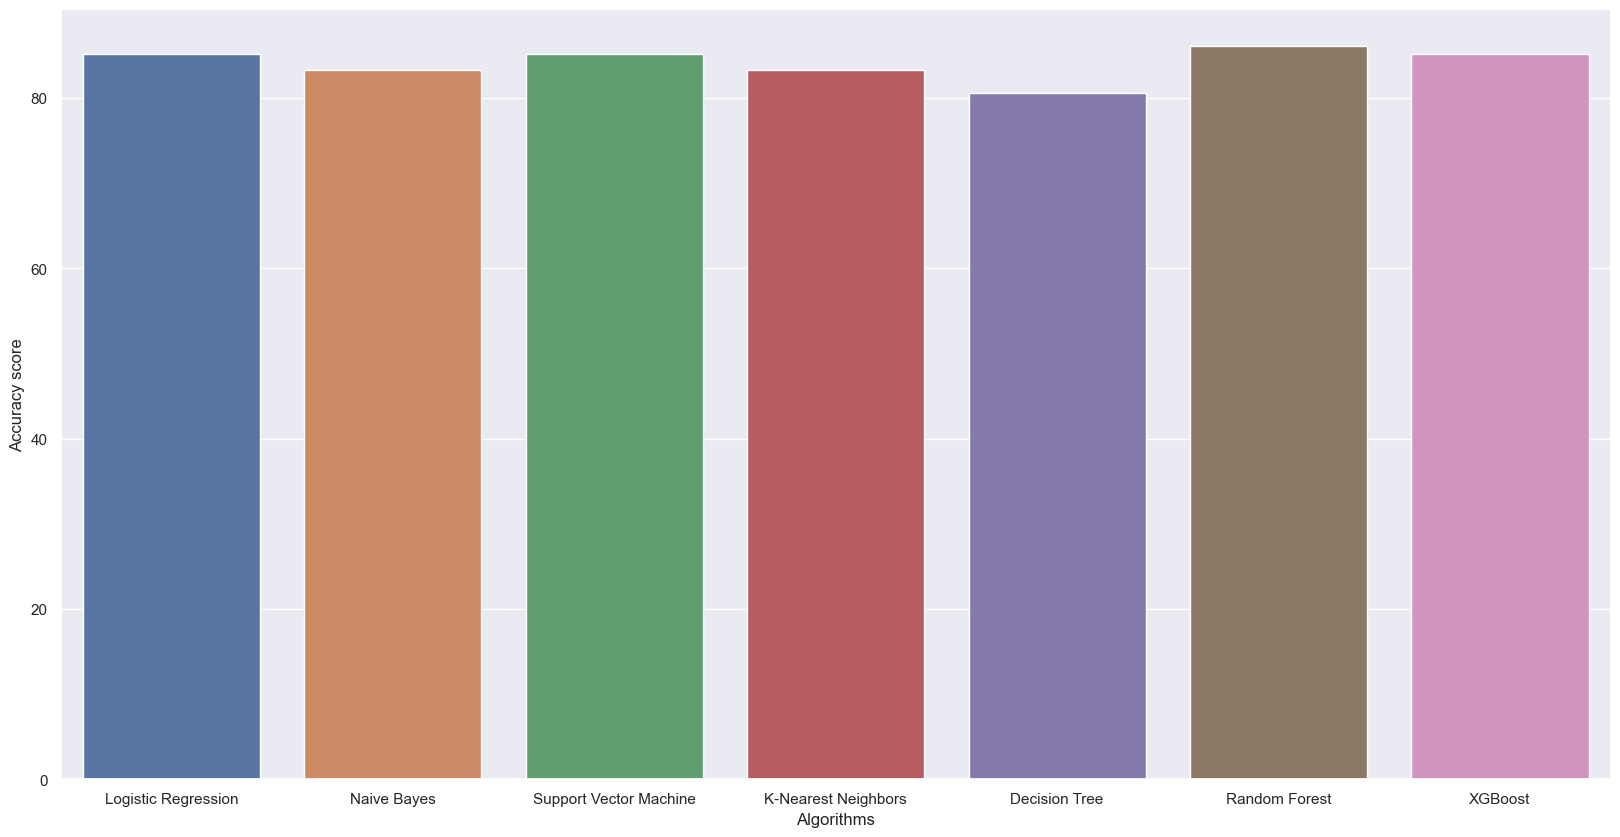

In [105]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

# Model Performance:

* The Random Forest algorithm achieved the highest accuracy score of 86.11%, followed by Logistic Regression and SVC, both with a score of 85.19%. Naive Bayes, Support Vector Machine, Random Forest, GradientBoost, XGBoost and Neural Network achieved lower accuracy scores ranging from 80.56% to 83.33%

## Challenges Faced in Data and Techniques


#### Data Quality and Preprocessing

* Handling the data outliers were initial challenge faced. Cleaning and preprocessing the data involves handling outliers and ensuring consistency in data formats.

#### Model Selection

* Since the dataset is small , the models which are sensitive to scalings were not generalizing well on the data.

## Influential Features:

* In heart disease prediction, influential features typically include age, gender, cholesterol levels, blood pressure, smoking status, diabetes, family history, BMI, physical activity, and blood sugar levels.

## Summary of all the conclusions :

* In the context of heart disease prediction, influential features encompass age, gender, cholesterol levels, blood pressure, smoking status, diabetes, family history, BMI, physical activity, and blood sugar levels, with their significance often determined through machine learning models like Random Forest, Decision Trees, or Gradient Boosting.






## Suggestions to the hospital to awake the predictions of heart disease prevent life threats

* Implement Predictive Analytics: Hospitals should integrate predictive analytics models based on machine learning algorithms to analyze patient data and identify individuals at higher risk of heart diseases, enabling proactive intervention.


* Electronic Health Records (EHR) Utilization: Utilize Electronic Health Records effectively to track and analyze patient health data over time, allowing for a comprehensive understanding of risk factors and trends.


* Patient Education Programs: Develop and promote patient education programs to increase awareness about heart disease risk factors, lifestyle modifications, and the importance of regular health check-ups.


* Remote Monitoring Solutions: Implement remote monitoring solutions and wearable technologies to continuously track vital signs, providing real-time data for healthcare professionals to detect early signs of cardiovascular issues.


* Telemedicine Services: Expand telemedicine services to facilitate regular check-ups and consultations, making healthcare more accessible and allowing timely detection of potential heart-related concerns.


* Collaboration with Data Scientists: Foster collaborations with data scientists and researchers to continuously improve predictive models, ensuring they stay updated with the latest medical research and advancements.


* Personalized Treatment Plans: Develop personalized treatment plans based on predictive analytics, taking into account individual patient profiles, genetic factors, and lifestyle choices to optimize preventive measures and interventions.


* Community Outreach Programs: Engage in community outreach programs to raise awareness about heart health, conduct regular health screenings, and encourage healthy lifestyle choices within the community.


* Integration with Public Health Initiatives: Align hospital efforts with broader public health initiatives to address societal factors contributing to heart diseases, such as promoting healthy eating, physical activity, and reducing environmental stressors.


* Continuous Training for Healthcare Professionals: Provide continuous training for healthcare professionals to ensure they are well-versed in the latest predictive technologies and can effectively interpret and act upon the insights provided by these tools.


* Risk Assessment Tools in Primary Care: Incorporate user-friendly risk assessment tools in primary care settings, enabling healthcare providers to quickly assess patient risk and implement preventive strategies.


* Patient Engagement Platforms: Utilize digital platforms to engage patients in their healthcare journey, encouraging them to actively participate in monitoring and managing their cardiovascular health.